In [ ]:
import pandas as pd
url='https://drive.google.com/file/d/1fd6ZuxxQINC67Ux5DJfkLZH08JdSCSqm/view?usp=sharing'
records = pd.read_csv(url)
path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df1=pd.read_csv(path).dropna()
df1.head()










,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')


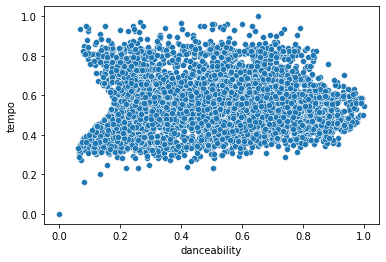

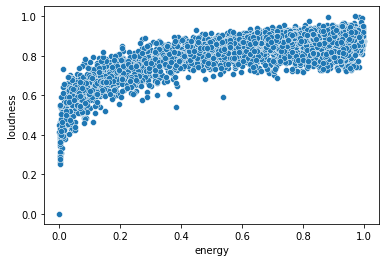

KMeans(n_clusters=10)


1283.7295492828812

In [ ]:
df_audio_features=pd.read_csv(path).dropna()
type(df_audio_features)
df_audio_features1=pd.DataFrame(df_audio_features)
df_audio_features1.columns=df_audio_features1.columns.str.replace(' ','')#Removes white spaces in column names
print(df_audio_features1.columns)
df_audio_features1.set_index(['name','artist'])#Indexes
#Outliers deletion
import numpy as np
from scipy import stats
df_audio_features1.drop(['name','artist','id','html','type','duration_ms','time_signature'],axis=1,inplace=True)
df_audio_features1#5235 rows * 11 columns
df_audio_features1[(np.abs(stats.zscore(df_audio_features1)) < 3).all(axis=1)]#4849 rows * 11 columns
# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler
my_min_max=MinMaxScaler(feature_range=(0,1))
# 3. fit the transformer to the data
my_min_max.fit(df_audio_features1)
# 4. use the transformer to transform the data
scaled_audio_features = my_min_max.transform(df_audio_features1)
# 5. reconvert the transformed data back to a DataFrame
recordsscaled=pd.DataFrame(scaled_audio_features,
             index=df_audio_features1.index,
             columns=df_audio_features1.columns)
recordsscaled
sns.scatterplot(data=recordsscaled,x='danceability',y='tempo')#Scatterplot for 2 variables
plt.show()#There are outliers 
sns.scatterplot(data=recordsscaled,x='energy',y='loudness')
plt.show()#Real correlation between energy and loudness/Should definitely show this graph in presentation
from sklearn.cluster import KMeans
records_kmeans=KMeans(n_clusters=10).fit(recordsscaled) #Creating 10 clusters
print(records_kmeans)
records_kmeans.inertia_#Far away : 1283.8. 











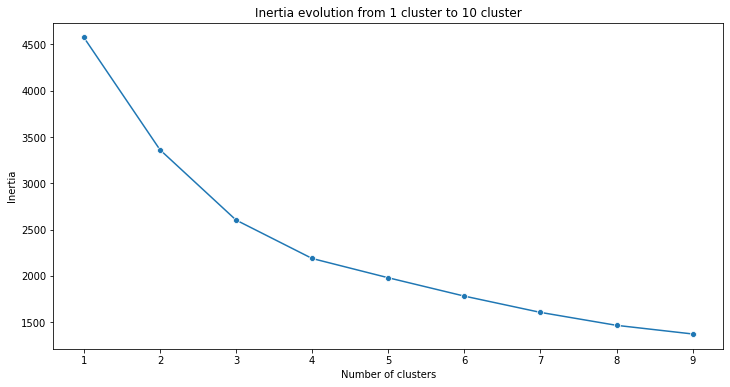

In [ ]:
max_k = 10
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(recordsscaled).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()#Conclusion: inflection point is at 10 approximately. Should create 10 clusters?

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(recordsscaled, records_kmeans.labels_)#Score = 0.26


0.2580045273582535

In [ ]:
columns = recordsscaled.columns

centroids = pd.DataFrame(records_kmeans.cluster_centers_)
centroids.columns = columns
centroids['cluster_name']=centroids.index
centroids


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_name
0,0.666854,0.678905,0.262903,0.865896,1.110223e-16,0.099415,0.247801,0.018814,0.184302,0.586973,0.563150,0
1,0.296209,0.897214,0.406557,0.844750,1.000000e+00,0.108678,0.012469,0.807137,0.206338,0.261984,0.570783,1
2,0.675713,0.728082,0.117389,0.868442,1.000000e+00,0.092059,0.173486,0.026429,0.181130,0.659921,0.573244,2
3,0.643440,0.762769,0.802255,0.877366,-6.661338e-16,0.105942,0.131048,0.030539,0.210208,0.528485,0.566591,3
4,0.332145,0.134782,0.432785,0.621371,1.000000e+00,0.049834,0.939107,0.865650,0.139115,0.174791,0.501133,4
5,0.509948,0.322021,0.444819,0.769365,1.000000e+00,0.055150,0.784084,0.038231,0.182448,0.427252,0.528202,5
6,0.693977,0.707527,0.725435,0.865928,1.000000e+00,0.090843,0.196727,0.019062,0.191353,0.696273,0.558990,6
7,0.340900,0.885650,0.571591,0.847249,1.110223e-16,0.108040,0.020015,0.774100,0.202045,0.263084,0.575715,7
8,0.372018,0.149053,0.518242,0.643551,1.554312e-15,0.049194,0.914827,0.685226,0.144042,0.205844,0.486539,8
9,0.380106,0.869535,0.540797,0.872276,1.000000e+00,0.115055,0.033559,0.083731,0.205733,0.220682,0.571022,9


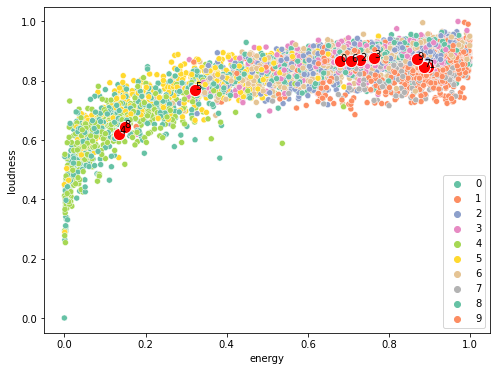

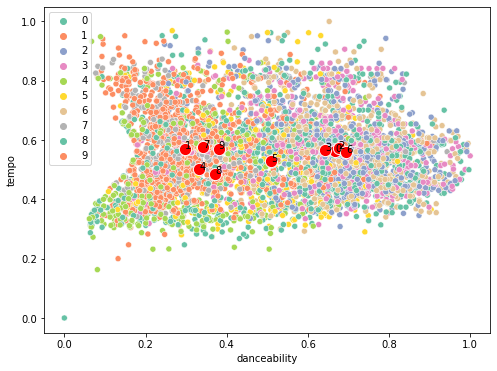

In [ ]:
plot_data = pd.DataFrame(recordsscaled)
plot_data.columns = columns
plot_data['cluster'] = records_kmeans.labels_
plot_data.head()

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='energy', y='loudness', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='energy', y='loudness', color='red', s=150)
for i in range(centroids.shape[0]):
    plt.text(
        x=centroids['energy'][i], 
        y=centroids['loudness'][i],
        s=centroids['cluster_name'][i], 
        size=10
    )
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='danceability', y='tempo', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='tempo', color='red', s=150)
for i in range(centroids.shape[0]):
    plt.text(
        x=centroids['danceability'][i], 
        y=centroids['tempo'][i],
        s=centroids['cluster_name'][i], 
        size=10
    )
plt.show()
